# Teste de Auto-Avaliação

# Código Modelagem - Decision Tree

## Análise exploratória dos Dados

Teste de Auto-Avaliação, gerando um código sem as 10 últimas linhas do arquivo csv.

# 1. Importando arquivos

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('kc_house_data_teste.csv') #DataFrame das informações dos imóveis 
df_backup = df.copy() #DataFrame de backup das informações dos imóveis 

# 2. Construção do Histograma

Construção de alguns histogramas tendo como base os dados da planilha de imoveis, afim de se ter uma melhor visualização dos dados nela contidos.

In [2]:
histogram_build = 'sqft_living'   #Variável selecionada para a análise, metro quadrado do imóvel 

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

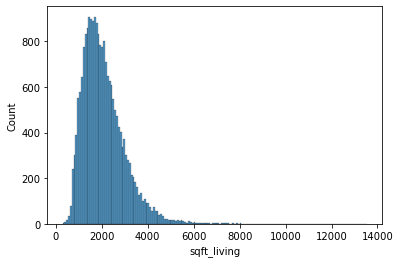

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = df, x = histogram_build)

# 3. Filtrando o CEP selecionado

Para o meu grupo, usar apenas cep (zipcode): 98001

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

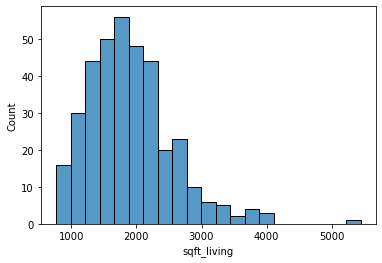

In [4]:
df_zipcode = df[df['zipcode'] == 98001]

sns.histplot(data = df_zipcode, x = histogram_build)

# 4.1 Aplicando os filtros necessários

Aplicando todos os filtros necessários para a construção da árvore de decisão, tendo como base os dados de CEP = 98001

In [5]:
#Definindo preço por metro quadrado 
price_sqft = df['price']/df['sqft_living']
df_backup['price_sqft'] = price_sqft

# 4.2 Filtrando o preço do imóvel

### Definindo o que seria abaixo, dentro ou fora da média

Nas estatísticas, um escore-z (ou score padrão) de uma observação é o número de desvios padrão acima ou abaixo da média do preço por metro quadrado do id. Para calcular um score z, é necessário saber a média desses valores e seu respectivo desvio padrão.

In [6]:
from PIL import Image

imagem = Image.open('imagens/z_score.png')

imagem

FileNotFoundError: [Errno 2] No such file or directory: 'imagens/z_score.png'

In [7]:
def class_output(x):  #criando uma função para agregar os valores do output
    if(x<-0.5):
        return 0
    elif(x<0.5):
        return 1
    else:
        return 2

df_zipcode = 98001
df_backup_zipcode = df_backup[df_backup['zipcode']==98001] #Novo DataFrame com o recorte do zipcode

media_price_sqft = df_backup_zipcode['price_sqft'].mean()  #Calculando a média por metro quadrado 

std_price_sqft = df_backup_zipcode['price_sqft'].std()  #Calculando o desvio padrão para calcular o Zscore

zscore = (df_backup_zipcode['price_sqft']-media_price_sqft) / std_price_sqft   #Calculando o zscore
df_backup_zipcode['zscore']  = zscore #Incluindo zscore no DF backup

df_backup_zipcode['class'] = df_backup_zipcode['zscore'].apply(class_output) #Armazenamos os parâmetros do output numa função 'class' e automatizamos o processo com a função apply

df_backup_zipcode

C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rapha\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,zscore,class
38,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,1969,0,98001,47.3341,-122.282,1290,7800,196.721311,1.340020,2
67,3717000160,20141009T000000,287000.0,4,2.50,2240,4648,2.0,0,0,...,2005,0,98001,47.3378,-122.257,2221,4557,128.125000,-0.687635,0
114,8961960160,20141028T000000,480000.0,4,2.50,3230,16171,2.0,0,3,...,2001,0,98001,47.3183,-122.253,2640,8517,148.606811,-0.082208,1
213,4014400292,20150114T000000,465000.0,3,2.50,2714,17936,2.0,0,0,...,2005,0,98001,47.3185,-122.275,2590,18386,171.333825,0.589585,2
292,1115450240,20141022T000000,360000.0,4,2.50,2160,9528,2.0,0,0,...,1992,0,98001,47.3341,-122.255,2280,9937,166.666667,0.451627,1
322,3353400435,20140721T000000,230000.0,3,2.00,1450,11204,1.0,0,0,...,2003,0,98001,47.2639,-122.252,1520,9518,158.620690,0.213795,1
354,9262800171,20150324T000000,252000.0,4,1.50,1550,19800,1.0,0,0,...,1969,0,98001,47.3117,-122.270,1640,22654,162.580645,0.330848,1
440,3353401710,20140923T000000,227950.0,3,1.50,1670,8230,1.0,0,0,...,1954,0,98001,47.2613,-122.255,2077,4910,136.497006,-0.440164,1
441,8159610030,20140722T000000,196000.0,3,2.25,2070,11576,2.0,0,0,...,1974,0,98001,47.3417,-122.271,1890,7519,94.685990,-1.676066,0
641,3329500060,20140728T000000,305000.0,4,2.50,2250,9091,1.0,0,0,...,1982,0,98001,47.3360,-122.269,1540,7802,135.555556,-0.467993,1


# 4.2 Excluindo as 10 últimas linhas

In [8]:
#df_backup_zipcode = df_backup_zipcode.drop(362,361,360,359,358,357,356,355,354,353)

df_backup_zipcode = df_backup_zipcode.reset_index(drop=True)
filter_ten = range(0,352)
#df_backup_zipcode_filter = df_backup_zipcode.iloc[[filtro], :]
#df_backup_zipcode_filter

df_backup_zipcode_filter_ten = df_backup_zipcode.loc[filter_ten]

df_backup_zipcode_filter_ten

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,zscore,class
0,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,1969,0,98001,47.3341,-122.282,1290,7800,196.721311,1.340020,2
1,3717000160,20141009T000000,287000.0,4,2.50,2240,4648,2.0,0,0,...,2005,0,98001,47.3378,-122.257,2221,4557,128.125000,-0.687635,0
2,8961960160,20141028T000000,480000.0,4,2.50,3230,16171,2.0,0,3,...,2001,0,98001,47.3183,-122.253,2640,8517,148.606811,-0.082208,1
3,4014400292,20150114T000000,465000.0,3,2.50,2714,17936,2.0,0,0,...,2005,0,98001,47.3185,-122.275,2590,18386,171.333825,0.589585,2
4,1115450240,20141022T000000,360000.0,4,2.50,2160,9528,2.0,0,0,...,1992,0,98001,47.3341,-122.255,2280,9937,166.666667,0.451627,1
5,3353400435,20140721T000000,230000.0,3,2.00,1450,11204,1.0,0,0,...,2003,0,98001,47.2639,-122.252,1520,9518,158.620690,0.213795,1
6,9262800171,20150324T000000,252000.0,4,1.50,1550,19800,1.0,0,0,...,1969,0,98001,47.3117,-122.270,1640,22654,162.580645,0.330848,1
7,3353401710,20140923T000000,227950.0,3,1.50,1670,8230,1.0,0,0,...,1954,0,98001,47.2613,-122.255,2077,4910,136.497006,-0.440164,1
8,8159610030,20140722T000000,196000.0,3,2.25,2070,11576,2.0,0,0,...,1974,0,98001,47.3417,-122.271,1890,7519,94.685990,-1.676066,0
9,3329500060,20140728T000000,305000.0,4,2.50,2250,9091,1.0,0,0,...,1982,0,98001,47.3360,-122.269,1540,7802,135.555556,-0.467993,1


# 4.3 Obtendo informações sobre o DF

In [9]:
df_backup_zipcode_filter_ten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 351
Data columns (total 24 columns):
id               352 non-null int64
date             352 non-null object
price            352 non-null float64
bedrooms         352 non-null int64
bathrooms        352 non-null float64
sqft_living      352 non-null int64
sqft_lot         352 non-null int64
floors           352 non-null float64
waterfront       352 non-null int64
view             352 non-null int64
condition        352 non-null int64
grade            352 non-null int64
sqft_above       352 non-null int64
sqft_basement    352 non-null int64
yr_built         352 non-null int64
yr_renovated     352 non-null int64
zipcode          352 non-null int64
lat              352 non-null float64
long             352 non-null float64
sqft_living15    352 non-null int64
sqft_lot15       352 non-null int64
price_sqft       352 non-null float64
zscore           352 non-null float64
class            352 non-null int64
dtypes: float64(

# 5. Discretizando por K-média

### Discretizando por preço

Discretização é o processo de colocar valores em buckets de modo que haja um número limitado de possíveis estados. Os próprios blocos são tratados como valores ordenados e discretos. A dicotomização é o caso especial de discretização em que o número de classes discretas é 2, que pode aproximar uma variável contínua como variável binária (criando uma dicotomia para fins de modelagem, como na classificação binária).

In [10]:
from sklearn.cluster import KMeans
import numpy as np
pricesT=[]
prices= df_backup_zipcode_filter_ten['price'].values
for price in prices:
      pricesT.append([price])
kmeans_price = KMeans(n_clusters=3, random_state=0).fit(pricesT) #Clusters=3 nos garantiu um melhor resultado

prices_disc=[]
for price in prices:
  price_disc=kmeans_price.predict([[price]])
  prices_disc.append(price_disc[0])

df_backup_zipcode_filter_ten['price_discretized']=prices_disc
df_backup_zipcode_filter_ten.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,zscore,class,price_discretized
0,7895500070,20150213T000000,240000.0,4,1.0,1220,8075,1.0,0,0,...,0,98001,47.3341,-122.282,1290,7800,196.721311,1.340020,2,0
1,3717000160,20141009T000000,287000.0,4,2.5,2240,4648,2.0,0,0,...,0,98001,47.3378,-122.257,2221,4557,128.125000,-0.687635,0,2
2,8961960160,20141028T000000,480000.0,4,2.5,3230,16171,2.0,0,3,...,0,98001,47.3183,-122.253,2640,8517,148.606811,-0.082208,1,1
3,4014400292,20150114T000000,465000.0,3,2.5,2714,17936,2.0,0,0,...,0,98001,47.3185,-122.275,2590,18386,171.333825,0.589585,2,1
4,1115450240,20141022T000000,360000.0,4,2.5,2160,9528,2.0,0,0,...,0,98001,47.3341,-122.255,2280,9937,166.666667,0.451627,1,2


<AxesSubplot:xlabel='price', ylabel='zipcode'>

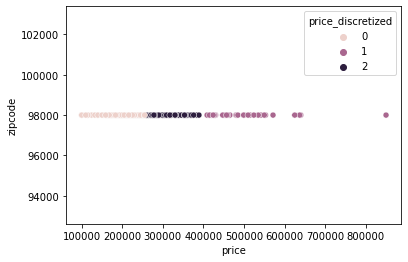

In [11]:
sns.scatterplot(x='price',y='zipcode',hue='price_discretized',data=df_backup_zipcode_filter_ten)

# Teste para Apresentação

Exposição dos critérios que utilizaremos no teste ao vivo:

In [12]:
test_for_presentation = df_backup_zipcode_filter_ten[['bedrooms','yr_built', 'bathrooms', 'floors', 'class']]
test_for_presentation.head()

,bedrooms,yr_built,bathrooms,floors,class
0,4,1969,1.0,1.0,2
1,4,2005,2.5,2.0,0
2,4,2001,2.5,2.0,1
3,3,2005,2.5,2.0,2
4,4,1992,2.5,2.0,1


# 6. Criando nossa árvore

# 6.1 Verificando as colunas

Verificando a correlação dos dados com a biblioteca seaborn, quanto mais próximo de 0, menor a correlação.

<AxesSubplot:>

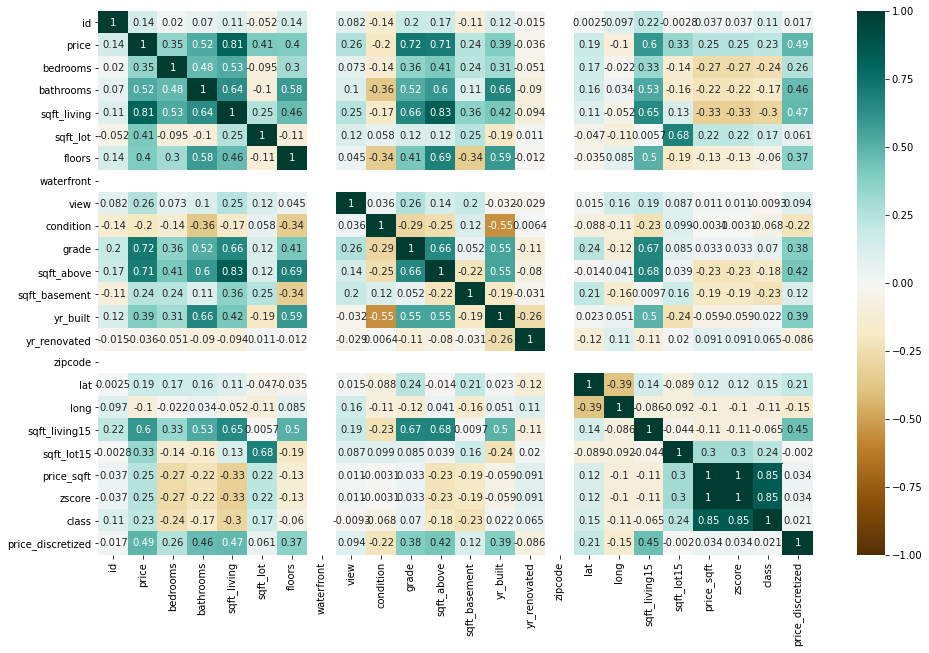

In [16]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_backup_zipcode_filter_ten.corr(),vmin=-1, vmax=1,annot = True, cmap='BrBG')

Criando um modelo de árvore de decisão

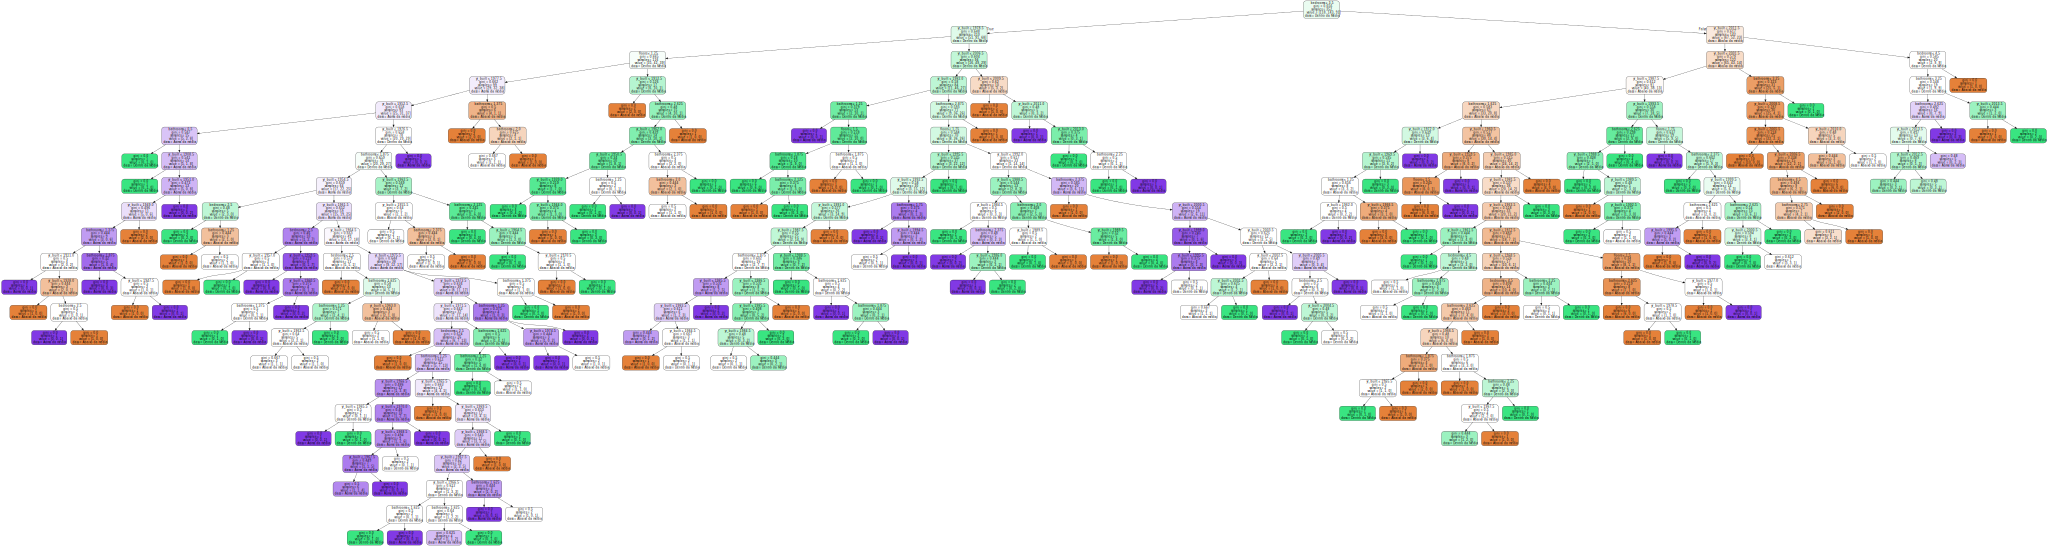

In [13]:
from sklearn import tree 
import graphviz 


X=df_backup_zipcode_filter_ten[['bedrooms', 'yr_built', 'bathrooms', 'floors']]  
Y=df_backup_zipcode_filter_ten[['class']]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#min_samples_leaf=20, min_impurity_decrease=0.001, min_samples_split=20
cn=['Abaixo da média ', 'Dentro da Média', 'Acima da média']

dot_data=tree.export_graphviz(clf,out_file=None,feature_names=X.columns, filled=True, rounded=True,class_names = cn, special_characters=True)
graph = graphviz.Source(dot_data)

graph


In [14]:
print("\n\n\nSeja bem-vinda(o) ao Mig! \nNosso chatbot que irá lhe fornecer um orçamento sobre imóveis!\n ")

while True: 
    print("Caso queira encerrar, digite: '-1' ")
    while True:
        p1 = int(input('Qual a quantidade de quartos? '))
        if p1 == -1:
            print("\n--------fim--------")
            break
            
        p2 = int(input('Qual o ano de construção? '))
        if p2 == -1:
            ("\n--------fim--------")
            break
            
        p3 = float(input('Qual a quantidade de banheiros?'))
        if p3 == -1:
            ("\n--------fim--------")
            break
            
        p4 = int(input('Qual o número de pisos?'))
        if p4 == -1:
            ("\n--------fim--------")
            break
   
        
        model_answer = clf.predict([[p1,p2,p3,p4]])

        answer = 'teste'

        ternary_result = int(model_answer)
        if ternary_result == 1:
            answer = 'Preço por m² está dentro da média (até 0.5 desvpad longe da média populacional)'
        elif ternary_result == 2:
            answer = 'Preço está acima da média (mais que 0.5 desvpad da média populacional)'
        else:
            answer = 'Preço está abaixo da média'

        print(answer)
        
    if p1 == -1 or p2 == -1 or p3 == -1 or p4 == -1:
        break
           




Seja bem-vinda(o) ao Mig! 
Nosso chatbot que irá lhe fornecer um orçamento sobre imóveis!
 
Caso queira encerrar, digite: '-1' 
Qual a quantidade de quartos? 4
Qual o ano de construção? 1969
Qual a quantidade de banheiros?1
Qual o número de pisos?1
Preço está acima da média (mais que 0.5 desvpad da média populacional)
Qual a quantidade de quartos? -1

--------fim--------


In [15]:
clf.score(X,Y) #Porcentagem de precisão da resposta

0.8664772727272727